In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
portfolio = pd.read_json('portfolio1.json', orient='records', lines=True)

In [3]:
portfolio.shape

(10, 6)

In [4]:
profile = pd.read_json('profile1.json', orient='records', lines=True)

In [5]:
profile.shape

(17000, 5)

In [6]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [7]:
transcript = pd.read_json('transcriptolan.json', orient='records', lines=True)

In [8]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [8]:
transcript.shape

(306534, 4)

In [10]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [7]:
#portfolio veri seti musterilere gonderilen teklifler ile ilgili bilgileri içerir.
#Channels sutununa one-hot-encoding uygulanmıstır.
#Veri setini yorumlamak amaciyla offer id leri kullanmak yerine offer name sutunu eklenir. name sutunu; offer_type, difficulty, reward, duration sütunlarının birlesiminden olusacaktır. 
#Ornegin, bogo_10_10_7, bogo offer type,10 dolar difficulty, 10 dolar odul ve 7 gun duration anlamina gelmektedir.



def add_portfolio_name(portfolio_df):
    #add_portfolio_name adinda offer name icin fonksiyon olusturulur.

    portfolio_df['name'] = portfolio_df.offer_type.astype(str) + "_" + portfolio_df.difficulty.astype(str) +\
                      "_" + portfolio_df.reward.astype(str) + \
                     "_" + portfolio_df.duration.astype(str)
    return portfolio_df


#channels sutununa one hot encoding uygulanmasi icin fonksiyon olusturulur.
def one_hot_channels(portfolio_df):
    
    channels = ['web', 'email', 'mobile', 'social']

    for channel in channels:
        portfolio_df[channel] = portfolio_df.channels.apply(lambda x: channel in x)*1

    #channels sutunu drop edilir
    portfolio_df = portfolio_df.drop('channels', axis=1)
    
    return portfolio_df
#portfolio preprocessing fonksiyonu ile add_portfolio_name ve one_hot channels kullanilir.
def portfolio_preprocessing(portfolio_df):
    
    portfolio_df = add_portfolio_name(portfolio_df)
    portfolio_df = one_hot_channels(portfolio_df)
    return portfolio_df

In [8]:
portfolio_worked = portfolio_preprocessing(portfolio)

In [9]:
portfolio_worked

,difficulty,duration,id,offer_type,reward,name,web,email,mobile,social
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,bogo_10_10_7,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,bogo_10_10_5,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,informational_0_0_4,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,bogo_5_5_7,1,1,1,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,discount_20_5_10,1,1,0,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,discount_7_3_7,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,discount_10_2_10,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,informational_0_0_3,0,1,1,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,bogo_5_5_5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,discount_10_2_7,1,1,1,0


In [14]:
channels = ['web', 'email', 'mobile', 'social']
portfolio_worked.groupby('offer_type').sum()[channels].sum()

web        8
email     10
mobile     9
social     6
dtype: int64

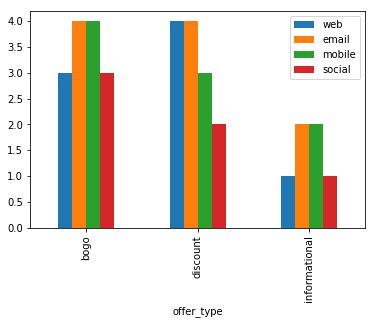

In [15]:
#teklif kanallarinin dagilimi
channels = ['web', 'email', 'mobile', 'social']
portfolio_worked.groupby('offer_type').sum()[channels].plot(kind='bar')

In [16]:
#teklif turlerinin dagilimi
portfolio_worked.offer_type.value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

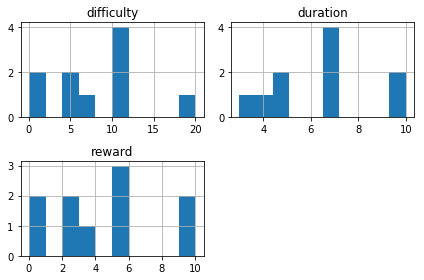

In [13]:
portfolio_worked[['difficulty','duration','reward']].hist();
plt.tight_layout()

In [14]:
profile.shape

(17000, 5)

In [15]:
profile.head(10)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [16]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [17]:
#Müsterilerin ortalama yası 62.53'dur. Standart sapma 26.78'dir. Ortalama gelir 65405 dolar, standart sapma 21598'dir.
profile[['age', 'income']].describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0b6472710>,
      dtype=object)

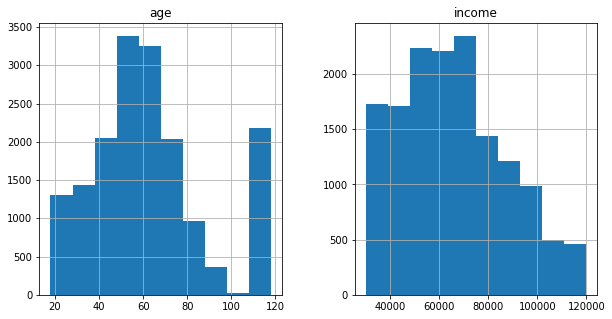

In [18]:
profile[['age', 'income']].hist(figsize=(10,5))

In [19]:
#118 yas ustune gerekli veri temizleme uygula

In [20]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

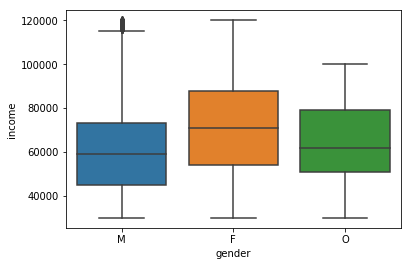

In [24]:
#Cinsiyetin diger sutunlara gore incelenmesi

# boxplot grafigi ile cinsiyete gore gelir dagilimi
sns.boxplot('gender', 'income', data=profile, order=['M', 'F', 'O'])

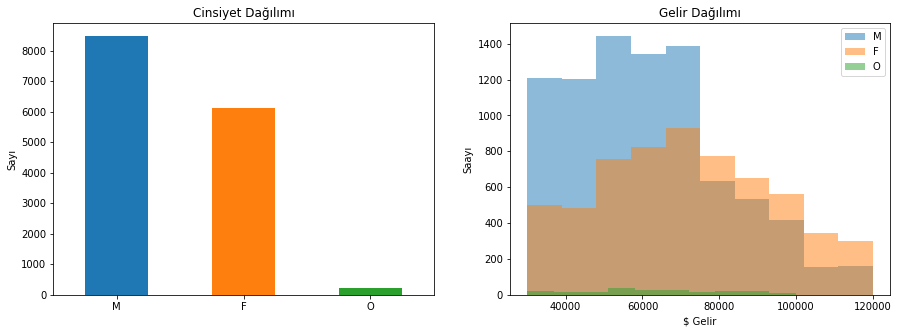

In [15]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

#plot gender distribution histogram
profile.gender.value_counts().plot(kind='bar', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_title('Cinsiyet Dağılımı')
ax1.set_ylabel('Sayı')

# plot income distribution histogram
ax2.hist(profile[profile.gender == 'M']['income'], alpha=0.5, label='M')
ax2.hist(profile[profile.gender == 'F']['income'], alpha=0.5, label='F')
ax2.hist(profile[profile.gender == 'O']['income'], alpha=0.5, label='O')
ax2.set_xlabel('$ Gelir')
ax2.set_ylabel('Saayı')
ax2.set_title('Gelir Dağılımı')
ax2.legend()

In [16]:
#Cinsiyete göre gelir istatikleri
profile.groupby('gender').describe()['income']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6129.0,71306.412139,22338.353773,30000.0,54000.0,71000.0,88000.0,120000.0
M,8484.0,61194.601603,20069.517615,30000.0,45000.0,59000.0,73000.0,120000.0
O,212.0,63287.735849,18938.594726,30000.0,51000.0,62000.0,79250.0,100000.0


In [17]:
#Müsterilerin %50'si erkek, %36'sı kadin kalan oran bilinmemektedir.
#Kadinların ortalama geliri 71306 dolar erkeklerin 61194 dolardir. Kadinların erkeklerden gelirleri daha fazladır.
#Diger cinsiyet grubunun gelir dagilimi erkeklerden daha yuksektir.

In [9]:
#became_member_on sutununda tarihler ayristirildi
def parse_dates(profile_df):
    profile_df = profile_df.copy()

    #stringe çevirme
    profile_df['became_member_on'] = profile_df.became_member_on.apply(lambda x: str(x))
    #datetime formatına çevirme
    profile_df['became_member_on'] = pd.to_datetime(profile_df.became_member_on)
    return profile_df

profile_worked = parse_dates(profile)

In [10]:

profile_worked.head()

,age,became_member_on,gender,id,income
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [19]:
profile_worked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null datetime64[ns]
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.1+ KB


Text(0.5, 1.0, 'became_member_on Sütunu Dağılımı')

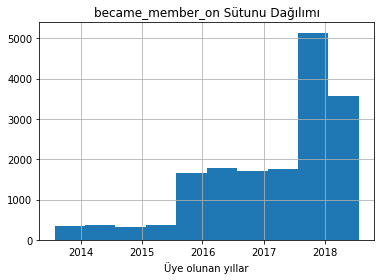

In [23]:
profile_worked.became_member_on.hist()
plt.xlabel('Üye olunan yıllar')
plt.title('became_member_on Sütunu Dağılımı')

In [25]:
#Her sutundaki eksik veri bilgisi
profile_worked.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [26]:
#Her satırdaki eksik veri sayisi
row_null = profile_worked.isnull().sum(axis=1)
row_null.value_counts()

0    14825
2     2175
dtype: int64

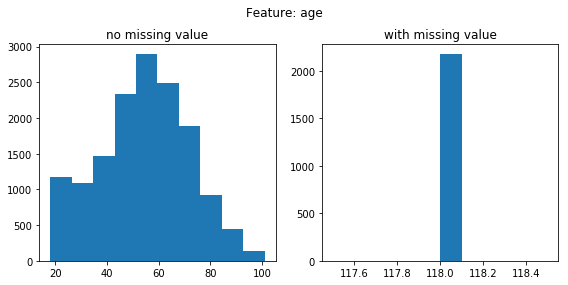

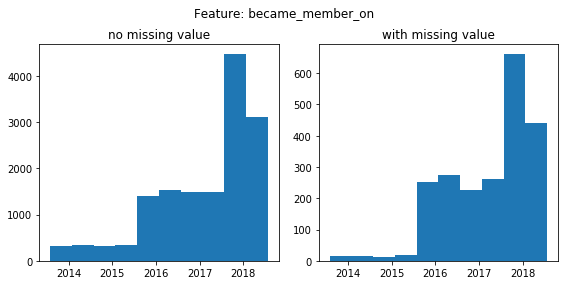

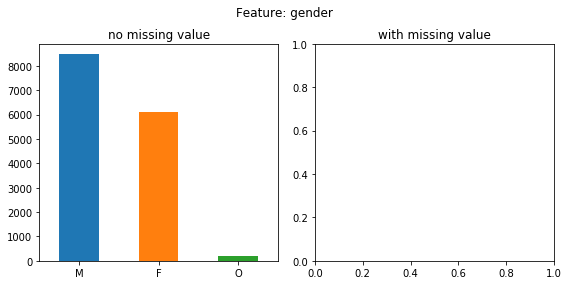

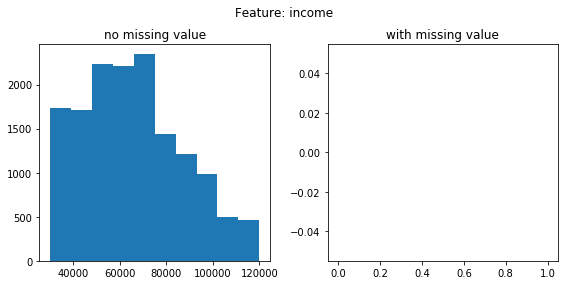

In [28]:
#Eksik verilerin karsilastirilmasi
profile_ = profile_worked[row_null ==0]
profile_null = profile_worked[row_null > 0]

for col in ['age', 'became_member_on','gender', 'income' ]:
    row_null = profile_worked.isnull().sum(axis=1)
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
   
    if col == 'gender':
        profile_[col].value_counts().plot(kind='bar', ax=ax1)
        ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(),rotation=0)
        try :
            profile_null[col].value_counts().plot(kind='bar', ax=ax2)
            
        except:
            pass
    else:
        profile_[col].hist(ax=ax1)
        profile_null[col].hist(ax=ax2)
    
    ax1.grid(False)
    ax2.grid(False)
    ax1.set_title('no missing value' )
    ax2.set_title('with missing value')
    f.suptitle('Feature: ' + col)
    f.tight_layout()
    f.subplots_adjust(top=0.85)

In [29]:
#profile veri setinde 17000 deger arasinda 2175 deger eksik veri vardir.
#became_member_on tarih bilgisi iceren sutun int veri turunden datetime veri turune cevrilmistir.

In [31]:
transcript.shape

(306534, 4)

In [32]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [33]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [34]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [35]:
#eksik veri kontrolu
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [36]:
#transkript veri setindeki unique profil verileri, profil verilerindeki unique verilerle eslesir
transcript.person.unique().shape

(17000,)

In [37]:
#Transkript veri kumesinde 306534 veri vardir
#Profile verilerindeki tum veriler, transkript verilerinde mevcuttur.
#Eksik deger yoktur.

In [38]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [11]:
#transcript veri seti value sutununda offer id ve amount  hakkında veriler vardir. Bu yuzden bu sutun ikiye ayrilmalidir.
#offer_id offer received, reviewed ve completed olaylari ile iliskilidir. Amount verisi event sutununun transaction verileri ile iliskilidir.
#Bu nedenle value sutunu offer id ve amount olarak kodlanir.

def encode_offer_id(x):
    try :
        return x['offer id']
    except:
        return x['offer_id']

def transcript_encoded(transcript_df):
    transcript_encoded = transcript_df.copy()
    transcript_encoded['offer_id'] = transcript[transcript.event.isin(['offer received', 'offer viewed', 'offer completed'])]\
                                                             .value.apply(encode_offer_id)
    transcript_encoded['amount'] =  transcript[transcript.event.isin(['transaction'])].value.apply(lambda x: x['amount'])
    return transcript_encoded

transcript_encoded(transcript).head()

,event,person,time,value,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [12]:
#profile ve portfolio veri setleri transcript dataframe ile birlestirilir.
def merge_transcript_profile(transcript_df, profile_df):
    profile_df = profile_parse_dates(profile_df)
    transcript_encoded_df = transcript_encoded(transcript_df)
    transcript_profile_df = pd.merge(transcript_encoded_df, profile_df, left_on=['person'], 
                                      right_on = ['id'], how ='left')
    transcript_profile_df = transcript_profile_df.drop(['id'], axis=1)
    
    return transcript_profile_df


def merge_transcript_profile_portfolio(transcript_df, profile_df, portfolio_df):
    portfolio_df = portfolio_preprocessing(portfolio_df)
    transcript_profile_df = merge_transcript_profile(transcript_df, profile_df)
    transcript_profile_porto = pd.merge(transcript_profile_df, portfolio_df, left_on = 'offer_id', right_on ='id', how='left').drop('id', axis=1)
    return transcript_profile_porto


transcript_merged = merge_transcript_profile_portfolio(transcript, profile, portfolio)
transcript_merged.head()

,event,person,time,value,offer_id,amount,age,became_member_on,gender,income,difficulty,duration,offer_type,reward,name,web,email,mobile,social
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,100000.0,5.0,7.0,bogo,5.0,bogo_5_5_7,1.0,1.0,1.0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,118,2017-08-04,None,NaN,20.0,10.0,discount,5.0,discount_20_5_10,1.0,1.0,0.0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,68,2018-04-26,M,70000.0,10.0,7.0,discount,2.0,discount_10_2_7,1.0,1.0,1.0,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,118,2017-09-25,None,NaN,10.0,10.0,discount,2.0,discount_10_2_10,1.0,1.0,1.0,1.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,118,2017-10-02,None,NaN,10.0,5.0,bogo,10.0,bogo_10_10_5,1.0,1.0,1.0,1.0


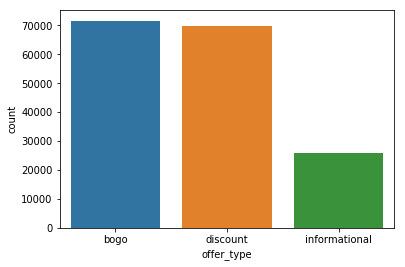

In [14]:
#offer type dagilimlari
sns.countplot('offer_type', data= transcript_merged)

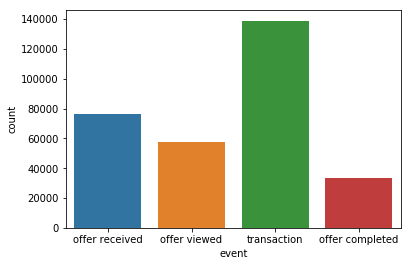

In [15]:
#transcript veri seti event type dagilimlari
sns.countplot('event', data= transcript_merged)

count    17000.000000
mean       104.438351
std        125.922619
min          0.000000
25%         21.820000
50%         69.405000
75%        148.782500
max       1608.690000
Name: amount, dtype: float64

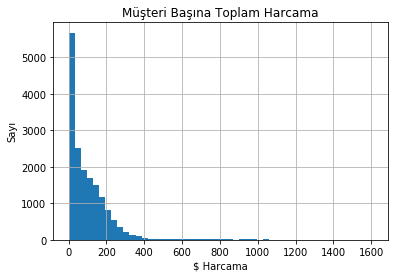

In [15]:
#Her müsteri icin toplam harcama
transcript_merged.groupby('person')['amount'].sum().hist(bins=50)
plt.xlabel('$ Harcama')
plt.ylabel('Sayı')
plt.title('Müşteri Başına Toplam Harcama')
transcript_merged.groupby('person')['amount'].sum().describe()

count    17000.000000
mean         8.173706
std          5.116250
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         36.000000
Name: amount, dtype: float64

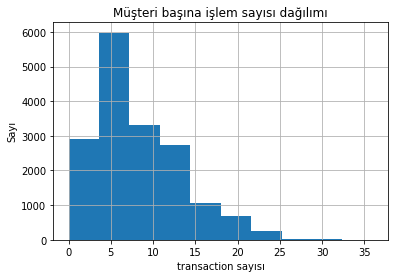

In [24]:
transcript_merged.groupby('person')['amount'].count().hist()
plt.xlabel('transaction sayısı')
plt.ylabel('Sayı')
plt.title('Müşteri başına işlem sayısı dağılımı')
transcript_merged.groupby('person')['amount'].count().describe()

In [13]:
transcript_merged_ = transcript_merged.copy()
transcript_merged_.loc[transcript_merged.gender.isnull(), 'gender'] ='U'

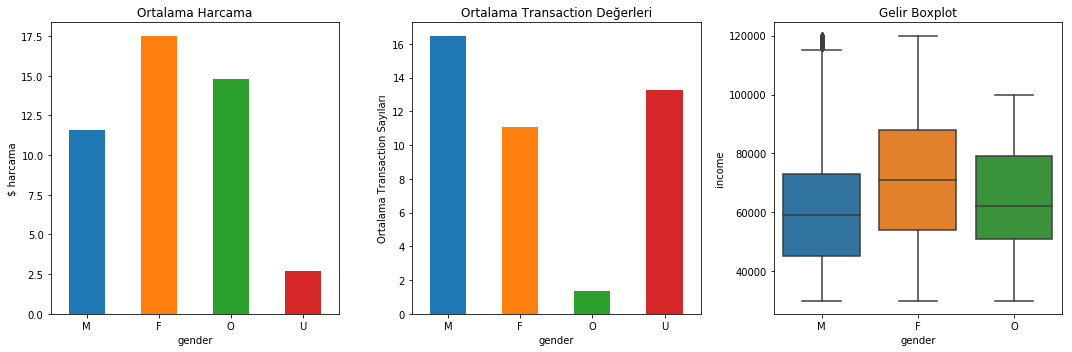

In [20]:
#Cinsiyete gore transaction sayilari
#ortalama harcama 
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
transcript_merged_.groupby('gender')['amount'].mean()[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax1);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylabel("$ harcama")
ax1.set_title('Ortalama Harcama')

# Ortalama Transaction degerleri

transcript_merged_.groupby(['gender', 'amount'])['amount'].count().mean(level=0)[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax2);
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=0);
ax2.set_ylabel("Ortalama Transaction Sayıları");
ax2.set_title("Ortalama Transaction Değerleri");

# Gelir dagilimlari
sns.boxplot('gender', 'income', data=profile, ax=ax3, order=['M', 'F', 'O'])
ax3.set_title('Gelir Boxplot')

plt.tight_layout()

Text(0.5, 0, 'gender')

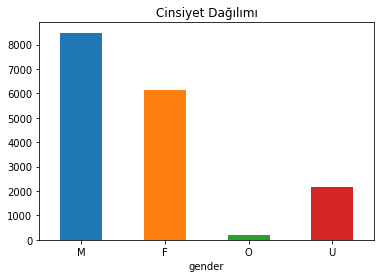

In [31]:
#Cinsiyet dagilimi
profile.fillna('U').gender.value_counts()[['M', 'F', 'O', 'U']].plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Cinsiyet Dağılımı');
plt.xlabel('gender')

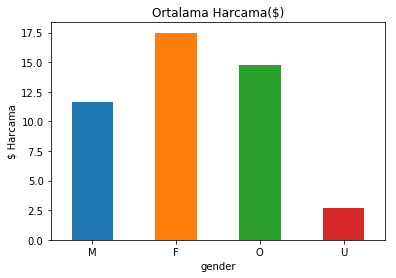

In [16]:
#Cinsiyete gore ortalama harcama
transcript_merged_.groupby('gender')['amount'].mean()[['M', 'F', 'O', 'U']].plot(kind='bar');
plt.xticks(rotation=0)
plt.ylabel("$ Harcama")
plt.title("Ortalama Harcama($)");

In [17]:
#En yüksek ortalama harcama kadinlar tarafindan yapilirken, cinsiyeti 'O' / diger cinsiyet olan müsteri grubu ikinci siradadir.

#Ortalama harcama, gelirle iliskilidir. Gelir ne kadar yuksekse, ortalama harcama o kadar yuksektir.

In [14]:
import helpers as h #transcript veri setindeki gecersiz islemlerin temizlendigi modul

In [15]:
portfolio = pd.read_json('portfolio1.json', orient='records', lines=True)
profile = pd.read_json('profile1.json', orient='records', lines=True)
transcript = pd.read_json('transcriptolan.json', orient='records', lines=True)

In [17]:
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)

The transcript_clean.csv and transcript_merge.csv file are available at local folder


In [18]:
transcript_clean.head()

,event,person,time,value,offer_id,amount,age,became_member_on,gender,income,difficulty,duration,offer_type,reward,name,web,email,mobile,social,invalid
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,100000.0,5.0,7.0,bogo,5.0,bogo_5_5_7,1.0,1.0,1.0,0.0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,118,2017-08-04,NaN,NaN,20.0,10.0,discount,5.0,discount_20_5_10,1.0,1.0,0.0,0.0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,68,2018-04-26,M,70000.0,10.0,7.0,discount,2.0,discount_10_2_7,1.0,1.0,1.0,0.0,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,118,2017-09-25,NaN,NaN,10.0,10.0,discount,2.0,discount_10_2_10,1.0,1.0,1.0,1.0,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,118,2017-10-02,NaN,NaN,10.0,5.0,bogo,10.0,bogo_10_10_5,1.0,1.0,1.0,1.0,0.0


In [19]:
transcript_all.head()

,event,person,time,value,offer_id,amount,age,became_member_on,gender,income,difficulty,duration,offer_type,reward,name,web,email,mobile,social,invalid
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,100000.0,5.0,7.0,bogo,5.0,bogo_5_5_7,1.0,1.0,1.0,0.0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,118,2017-08-04,NaN,NaN,20.0,10.0,discount,5.0,discount_20_5_10,1.0,1.0,0.0,0.0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,68,2018-04-26,M,70000.0,10.0,7.0,discount,2.0,discount_10_2_7,1.0,1.0,1.0,0.0,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,118,2017-09-25,NaN,NaN,10.0,10.0,discount,2.0,discount_10_2_10,1.0,1.0,1.0,1.0,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,118,2017-10-02,NaN,NaN,10.0,5.0,bogo,10.0,bogo_10_10_5,1.0,1.0,1.0,1.0,0.0


In [20]:
profile_updated = h.feature_extraction(transcript_clean,transcript_all,profile, portfolio)

The profile_updated.csv file is available at local folder.


In [21]:
profile_updated.shape

(17000, 92)

In [22]:
profile_updated.head()

,age,became_member_on,gender,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,...,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
68be06ca386d4c31939f3a4f0e3dd783,118,2017-02-12,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,...,0.5,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.285714
0610b486422d4921ae7d2bf64640c50b,55,2017-07-15,F,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
38fe809add3b4fcf9315a9694bb96ff5,118,2018-07-12,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000
78afa995795e4d85b5d9ceeca43f5fef,75,2017-05-09,F,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.333333
a03223e636434f42ac4c3df47e8bac43,118,2017-08-04,NaN,NaN,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000


In [23]:
profile_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 68be06ca386d4c31939f3a4f0e3dd783 to e4052622e5ba45a8b96b59aba68cf068
Data columns (total 92 columns):
age                                               17000 non-null int64
became_member_on                                  17000 non-null datetime64[ns]
gender                                            14825 non-null object
income                                            14825 non-null float64
offer received_bogo_10_10_7                       17000 non-null float64
offer received_bogo_10_10_5                       17000 non-null float64
offer received_informational_0_0_4                17000 non-null float64
offer received_bogo_5_5_7                         17000 non-null float64
offer received_discount_20_5_10                   17000 non-null float64
offer received_discount_7_3_7                     17000 non-null float64
offer received_discount_10_2_10                   17000 non-null float64
offer received_informational_0_